In [1]:
%matplotlib inline


# 2D Optimal transport between empirical distributions


Illustration of 2D optimal transport between discributions that are weighted
sum of diracs. The OT matrix is plotted with the samples.




In [2]:
# Author: Remi Flamary <remi.flamary@unice.fr>
#         Kilian Fatras <kilian.fatras@irisa.fr>
#
# License: MIT License

import numpy as np
import matplotlib.pylab as pl
import ot
import ot.plot

Generate data
-------------



In [3]:
#%% parameters and data generation

n = 50  # nb samples

mu_s = np.array([0, 0])
cov_s = np.array([[1, 0], [0, 1]])

mu_t = np.array([4, 4])
cov_t = np.array([[1, -.8], [-.8, 1]])

xs = ot.datasets.make_2D_samples_gauss(n, mu_s, cov_s)
xt = ot.datasets.make_2D_samples_gauss(n, mu_t, cov_t)

a, b = np.ones((n,)) / n, np.ones((n,)) / n  # uniform distribution on samples

# loss matrix
M = ot.dist(xs, xt)
M /= M.max()

Plot data
---------



Text(0.5,1,'Cost matrix M')

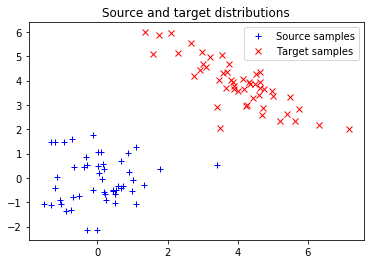

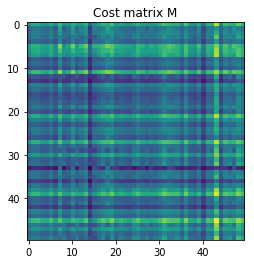

In [4]:
#%% plot samples

pl.figure(1)
pl.plot(xs[:, 0], xs[:, 1], '+b', label='Source samples')
pl.plot(xt[:, 0], xt[:, 1], 'xr', label='Target samples')
pl.legend(loc=0)
pl.title('Source and target distributions')

pl.figure(2)
pl.imshow(M, interpolation='nearest')
pl.title('Cost matrix M')

Compute EMD
-----------



Text(0.5,1,'OT matrix with samples')

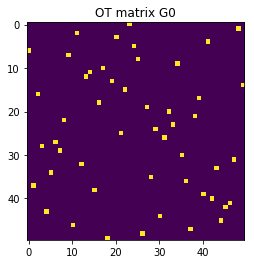

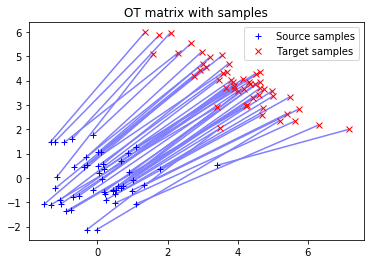

In [5]:
#%% EMD

G0 = ot.emd(a, b, M)

pl.figure(3)
pl.imshow(G0, interpolation='nearest')
pl.title('OT matrix G0')

pl.figure(4)
ot.plot.plot2D_samples_mat(xs, xt, G0, c=[.5, .5, 1])
pl.plot(xs[:, 0], xs[:, 1], '+b', label='Source samples')
pl.plot(xt[:, 0], xt[:, 1], 'xr', label='Target samples')
pl.legend(loc=0)
pl.title('OT matrix with samples')

Compute Sinkhorn
----------------



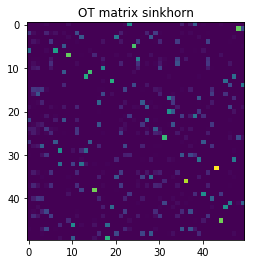

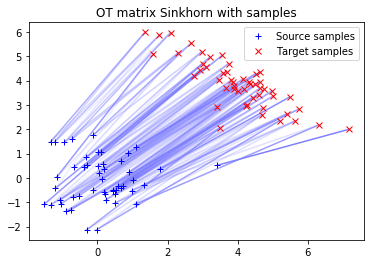

In [6]:
#%% sinkhorn

# reg term
lambd = 1e-3

Gs = ot.sinkhorn(a, b, M, lambd)

pl.figure(5)
pl.imshow(Gs, interpolation='nearest')
pl.title('OT matrix sinkhorn')

pl.figure(6)
ot.plot.plot2D_samples_mat(xs, xt, Gs, color=[.5, .5, 1])
pl.plot(xs[:, 0], xs[:, 1], '+b', label='Source samples')
pl.plot(xt[:, 0], xt[:, 1], 'xr', label='Target samples')
pl.legend(loc=0)
pl.title('OT matrix Sinkhorn with samples')

pl.show()

Emprirical Sinkhorn
----------------



/home/rflamary/PYTHON/POT/ot/bregman.py:374: RuntimeWarning: divide by zero encountered in true_divide
  v = np.divide(b, KtransposeU)
/home/rflamary/PYTHON/POT/ot/plot.py:83: RuntimeWarning: invalid value encountered in double_scalars
  if G[i, j] / mx > thr:


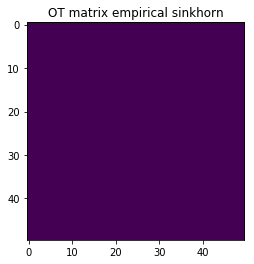

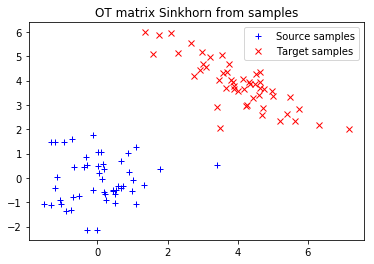

In [7]:
#%% sinkhorn

# reg term
lambd = 1e-3

Ges = ot.bregman.empirical_sinkhorn(xs, xt, lambd)

pl.figure(7)
pl.imshow(Ges, interpolation='nearest')
pl.title('OT matrix empirical sinkhorn')

pl.figure(8)
ot.plot.plot2D_samples_mat(xs, xt, Ges, color=[.5, .5, 1])
pl.plot(xs[:, 0], xs[:, 1], '+b', label='Source samples')
pl.plot(xt[:, 0], xt[:, 1], 'xr', label='Target samples')
pl.legend(loc=0)
pl.title('OT matrix Sinkhorn from samples')

pl.show()